FFR 120  
Felix Waldschock

HW 3 
Exercise 12.6
## Average path length and clustering coef ficient of Albert–Barabási preferential-growth graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


## Define functions

# generate adjacency matrix
def generateAdjacencyMatrix(n):
    A = np.ones((n,n))
    # diagonal = 0 
    np.fill_diagonal(A, 0)
    return A

In [2]:
def getDegree(A):
    # get the sum over one axis, e.g the columns
    return np.sum(A,axis=0)

In [3]:
# generate adjacency matrix
def generateAdjacencyMatrix(n):
    A = np.ones((n,n))
    # diagonal = 0 
    np.fill_diagonal(A, 0)
    return A

In [4]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')
    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')

In [5]:
def rouletteWheelSelection(Vector):
    # make a cumsum of the vector
    cumsum = np.cumsum(Vector)
    # normalize the cumsum
    cumsum = cumsum / np.sum(Vector)

    # generate a random number between 0 and 1
    r = np.random.rand()

    # find the index of the cumsum using searchsorted
    index = np.searchsorted(cumsum, r)

    # set the vector[index] to 0
    Vector[index] = 0

    return index, Vector

In [6]:
def AlbertBarabasi(A, m, n0, n):
    # loop over (n-n0)
    for i in range(n-n0):
        # get degree
        degree = getDegree(A)

        # add a new node to A, pad with zeros
        A = np.pad(A, ((0,1),(0,1)), 'constant', constant_values=0)

        # add the new node to m extant nodes choosem randomly using a probability that is proportional to their degree
        degree = getDegree(A)
        for j in range(m):
            # get the probability
            indx, degree = rouletteWheelSelection(degree)
            
            # add the edge
            A[indx,-1] = 1
            A[-1,indx] = 1

    return A

In [7]:
# compute the average path length of matrix A
def computePathMatrix(A):
    n = A.shape[0]

    # copy A
    A_copy = np.copy(A)

    # compute the shortest path length between all pairs of nodes
    # initialize matrix with -1
    L = np.ones((n,n)) * (-1)

    # implement a copy of L where the diagonal is =-1 so that the while case can just check that none of the elements are -1
    B = np.copy(L)
    # B set diagonal to 0
    np.fill_diagonal(B, 0)

    # set increment t
    t = 1
    t_max = 200

    # create a History tensor H with 3 dimensions 
    H = np.zeros((n,n,t_max+1))

    while (np.any(B == -1)):
    #for b in range(5):
        for i in range(n):
            for j in range(i,n):
                if A[i,j] != 0:
                    if L[i,j] == L[j,i]:
                        if L[i,j] == -1:
                            #if i != j:
                                # if i != j, set L[i,j] = t+1
                                L[i,j] = t
                                L[j,i] = t
                                #print("Changed L[{},{}] to {}".format(i,j,t))
        # increase power of A
        A = np.matmul(A,A_copy)
        # Update counter t
        t += 1
        
        # Update B
        B = np.copy(L)
        np.fill_diagonal(B, 0)

        # push L to H
        H[:,:,t-1] = L

        # if t > 10, break
        if t > t_max:
            print("Breaking, t > 200")
            break
    # print("Finished after T = {}".format(t))

    return L,H,A,A_copy
    # return L

In [8]:
# Formula 12.3
def getClusteringCoefficient(A):
    A_2 = np.matmul(A,A)
    A_3 = np.matmul(A_2,A)
    # get the diagonal
    diag = np.diagonal(A_3)
    # get the sum of the diagonal
    sumDiag = np.sum(diag)              # Dimension: (1,1)

    # k_i is the degree of node i 
    k_i = np.sum(A, axis=0)             # Dimension: (n,1)
    # elementwise square of k_i
    k_i_2 = np.square(k_i)              # Dimension: (n,1)
    # sum of k_i_2
    sum_Triples = np.sum(k_i_2 - k_i)   # Dimension: (1,1)

    # get the number of nodes
    n = A.shape[0]

    # compute the clustering coefficient
    C = sumDiag / sum_Triples

    return C

In [9]:
# compute the average path length
def getAveragePathLength(L):
    # sum the matrix L and divide by the number of elements minus the diagonal
    n = L.shape[0]
    sum = np.sum(L)
    avg = sum / (n*n - n)
    return avg
    

# Simulation

In [10]:
n = np.logspace(1,3,40, dtype=int)
m = np.array([1,3,10])
n0 = 10


In [11]:
# init the network
A_init = generateAdjacencyMatrix(n0)

# store the avergae path length
AvgL = np.zeros((len(m), len(n)))

# loop over m
for i in trange(len(m)):
    A_ = np.zeros((n0,n0,len(m), len(n)))
    for j in range(len(n)):
        A_b = AlbertBarabasi(A_init, m[i], n0, n[j])
        L_b,_,_,_ = computePathMatrix(A_b)
        AvgL[i,j] = getAveragePathLength(L_b)





  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [02:34<00:00, 51.44s/it]


In [12]:
# Clustering coefficient for several m [1 - 20] for n = 1000 n0 = 20
n_2 = 1000
n0_2 = 20
m_2 = np.arange(1,21,1)

# init the network
A_init_2 = generateAdjacencyMatrix(n0_2)

# store the clustering coefficient
C_2 = np.zeros((len(m_2),1))

# loop over m
for i in trange(len(m_2)):
    A_b_2 = AlbertBarabasi(A_init_2, m_2[i], n0_2, n_2)
    C_2[i] = getClusteringCoefficient(A_b_2)
    

100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


# Visualize

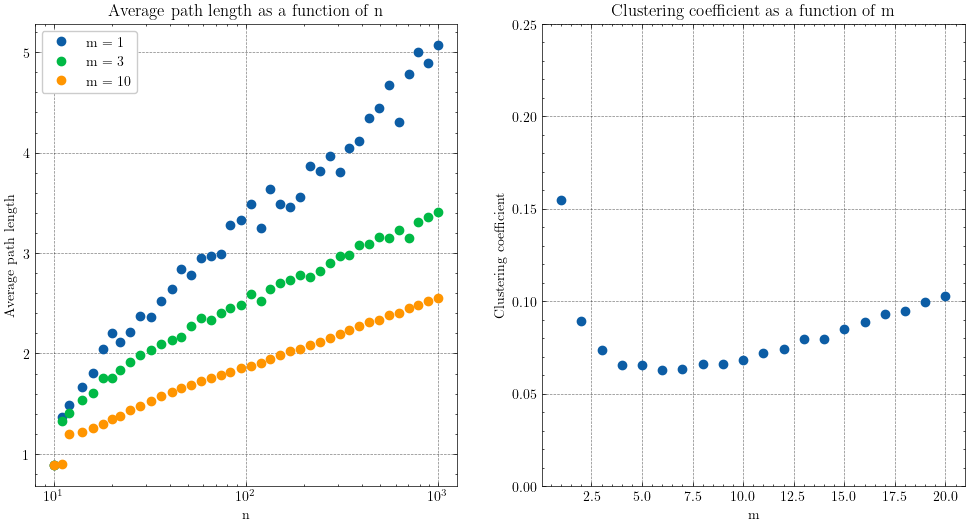

In [13]:
# create a figure, subplot 1x2
fig, ax = plt.subplots(1,2, figsize=(12,6))

# in the left plot, show average path length as a function of n, for the different values of m
for i in range(len(m)):
    ax[0].semilogx(n, AvgL[i,:], 'o', label="m = {}".format(m[i]))
ax[0].set_xlabel("n")
ax[0].set_ylabel("Average path length")
ax[0].set_title("Average path length as a function of n")
ax[0].legend()

# in the right plot, show the clustering coefficient as a function of m
ax[1].plot(m_2, C_2, 'o')
ax[1].set_xlabel("m")
ax[1].set_ylabel("Clustering coefficient")
ax[1].set_title("Clustering coefficient as a function of m")
ax[1].set_ylim(0.0,0.25)

plt.show()